In [3]:
%matplotlib inline
import os
import sys
import matplotlib.pyplot as plt
import numpy as np

sCaffeFolder =  '/home/gines/devel/openpose_caffe_train/'
# sBasePath = '/media/posefs3b/Users/gines/openpose_train/training_results/1_19Binary/pose/body_19/'
# sBasePath = '/media/posefs3b/Users/gines/openpose_train/training_results/1_19Binary2/pose/body_19/'
# sBasePath = '/media/posefs3b/Users/gines/openpose_train/training_results/2_19bOcclusion/pose/body_19b/'
sBasePath = '/media/posefs3b/Users/gines/openpose_train/training_results/2_19MoreScale2/pose/body_19/'
sFirstBinaryLayer = 'Mconv4_stage1_L2'

sProtoTxt =  sBasePath + 'pose_deploy.prototxt'
# sCaffemodelPath =  sBasePath + 'pose_iter_202000.caffemodel'
# sCaffemodelPath =  sBasePath + 'pose_iter_12000.caffemodel'
# sCaffemodelPath =  sBasePath + 'pose_iter_336000.caffemodel'
sCaffemodelPath =  sBasePath + 'pose_iter_776000.caffemodel'

# Caffe includes
sys.path.insert(0, os.path.join(sCaffeFolder, 'python'))
import caffe
from caffe import layers as L  # pseudo module using __getattr__ magic to generate protobuf messages
from caffe import params as P  # pseudo module using __getattr__ magic to generate protobuf messages

def net_to_py_readable(protoTxtPath, caffemodelPath):
    net = caffe.Net(protoTxtPath, caffemodelPath, caffe.TEST) # read the net + weights
    pynet_ = []
    for li in xrange(len(net.layers)):  # for each layer in the net
        layer = {}  # store layer's information
        layer['name'] = net._layer_names[li]
        # for each input to the layer (aka "bottom") store its name and shape
        layer['bottoms'] = [(net._blob_names[bi], net.blobs[net._blob_names[bi]].data.shape) 
                                                 for bi in list(net._bottom_ids(li))] 
        # for each output of the layer (aka "top") store its name and shape
        layer['tops'] = [(net._blob_names[bi], net.blobs[net._blob_names[bi]].data.shape) 
                                            for bi in list(net._top_ids(li))]
        layer['type'] = net.layers[li].type  # type of the layer
        # the internal parameters of the layer. not all layers has weights.
        layer['weights'] = [net.layers[li].blobs[bi].data[...] 
                                                for bi in xrange(len(net.layers[li].blobs))]
        pynet_.append(layer)
    return pynet_

sNetParameters = net_to_py_readable(sProtoTxt, sCaffemodelPath)

In [2]:
startRecording = False
for netParameter in sNetParameters:
    if netParameter['name'] == sFirstBinaryLayer:
        startRecording = True
    if netParameter['type'] == 'Convolution' and startRecording:
        # weights = netParameter['weights'][0]
        # bias = netParameter['weights'][1]
        weightsArray = np.asarray(netParameter['weights'][0], dtype=np.float32)
        if weightsArray.shape[2] > 1 and weightsArray.shape[3] > 1:
            weightsArray = weightsArray.reshape(np.prod(weightsArray.shape), 1).copy()
            plt.hist(weightsArray, normed=True, bins=100)
            plt.ylabel('Probability');
            plt.xlabel('Weight value');
#             plt.ylim(0, ymax)
            plt.xlim(-0.15, 0.15)


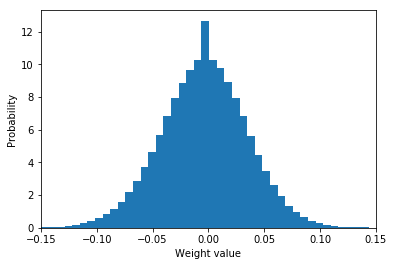

In [8]:
startRecording = False
for netParameter in sNetParameters:
    if netParameter['name'] == 'conv4_3_CPM':
        # weights = netParameter['weights'][0]
        # bias = netParameter['weights'][1]
        weightsArray = np.asarray(netParameter['weights'][0], dtype=np.float32)
        if weightsArray.shape[2] > 1 and weightsArray.shape[3] > 1:
            weightsArray = weightsArray.reshape(np.prod(weightsArray.shape), 1).copy()
            plt.hist(weightsArray, normed=True, bins=101)
            plt.ylabel('Probability');
            plt.xlabel('Weight value');
#             plt.ylim(0, ymax)
            plt.xlim(-0.15, 0.15)
